# Plot from the server

In [1]:
%load_ext autoreload
%autoreload 2

import sys
if '..' not in sys.path:
    sys.path.append('..')


import pandas as pd
import numpy as np
import networkx as nx
import copy
import scipy as sp
import math
import seaborn
import pickle
import warnings
import matplotlib
import re
import multiprocessing

from lib.mobilitysim import MobilitySimulator
from lib.dynamics import DiseaseModel
from lib.inference import * 
from bayes_opt import BayesianOptimization
from lib.parallel import *
from lib.distributions import CovidDistributions
from lib.plot import Plotter
from lib.data import collect_data_from_df
from lib.measures import (
    MeasureList, 
    BetaMultiplierMeasure, 
    BetaMultiplierMeasureByType,
    SocialDistancingForAllMeasure, 
    SocialDistancingForKGroups,
    SocialDistancingByAgeMeasure,
    SocialDistancingForPositiveMeasure, 
    ComplianceForAllMeasure,
    Interval,
    ComplianceForEssentialWorkers,
    SocialDistancingForNonEssential)

from lib.mobilitysim import MobilitySimulator
from lib.town_data import generate_population, generate_sites, compute_distances
from lib.town_maps import MapIllustrator

In [3]:
def save_summary(summary, filename):
    with open('summaries/' + filename, 'wb') as fp:
        pickle.dump(summary, fp)
    
def load_summary(filename):
    with open('summaries/' + filename, 'rb') as fp:
        summary = pickle.load(fp)
    return summary


summaries_SD_6 = load_summary('emma_summaries_SD_6_essential.pk')

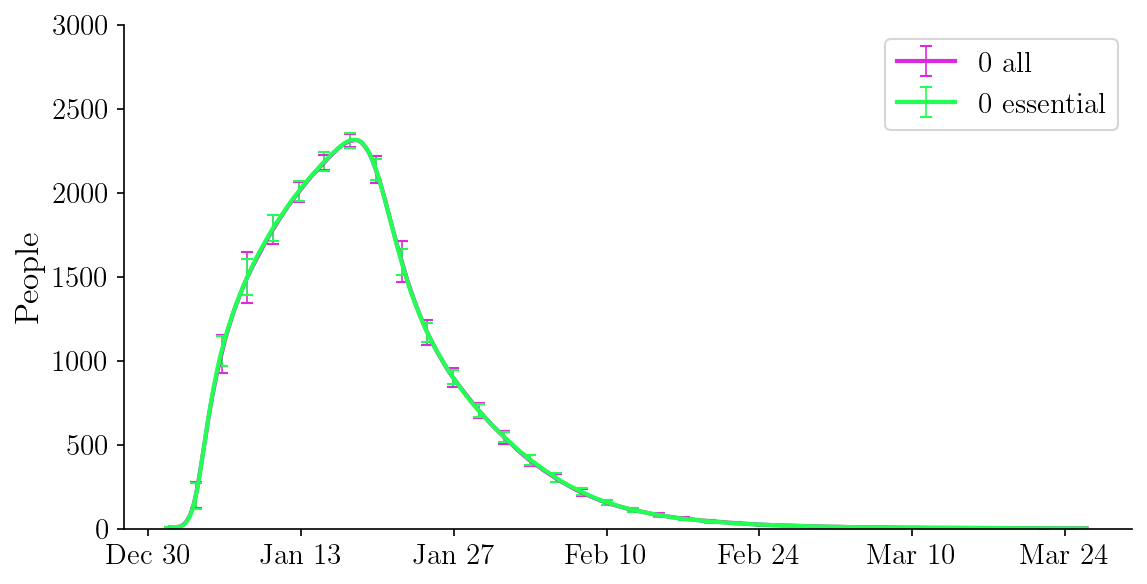

In [4]:
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0 all','0 essential','0.75 all','0.75 essential','1 all','1 essential']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)